# HW02 Question 4: Monty Hall

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Section a - Build the game

In [3]:
# radom function to decide behind which door the car is (car = 1, goat = 0)

def decideCar():
    gameVec = np.zeros(3)
    gameVec[np.random.randint(3)] = 1
        
    return gameVec

In [4]:
# random function to decide which player choose which door

def playersDoors():
    
    playersChoice = {
        "p1" : np.random.randint(3),
        "p2" : np.random.randint(3),
        "p3" : np.random.randint(3),
    }
    return playersChoice

In [5]:
# function to decide which door the host opens

def hostOpenDoor(playersDoor,gameVec):
    
    hostDoor = 0
    if(gameVec[playersDoor]):
        
        # host randomly chooses between doors with goats

        hostDoor = np.random.randint(3)
        while( hostDoor == playersDoor): 
            hostDoor = np.random.randint(3)
         # keep randing doors until you choose a goat (different door than players')
    
    else:

        tmp = np.where(gameVec==1)
        hostDoor = 3-playersDoor-tmp[0] #algo to make the host always choose the door with the goat
        
    return hostDoor


In [6]:
def changeDoor(player, playerDict, hostDoor):
    choice = ['switchDoor', 'keepDoor'] # to decide if to switch the door or keep current door
    
    if(player == "p1"):
        
        #play the game according to p1
        return playerDict # door won't change
        
    elif(player == "p2"):
        
        #play the game according to p2
        playerDict[player] = 3 - hostDoor - playerDict[player] # always change door
        
    else:
    
        #play the game according to p3
        p3_choice = random.choices(choice, [.5, .5])[0] # switch in probability of .5
        if(p3_choice == "switchDoor"):
            playerDict[player] = 3 - hostDoor - playerDict[player] # switch door
        
    return playerDict
    

In [7]:
def didWin(player,playerDict,gameVec):
    if(gameVec[playerDict[player]]):
        #print("WIN!")
        return 1
    #print("LOOSE!")
    return 0

In [8]:
def playGame(player_):
    gameVec_ = decideCar()
    playersChoice_ = playersDoors() # creat dictionary
    #assume play game with p1
    player_name = player_ #player's name
    player_choice = playersChoice_[player_name] #choose players value from dictionary
    hostDoor = hostOpenDoor(player_choice,gameVec_)
    #print(gameVec_)
    #print("player 1 choose door number %d" %(player_choice + 1))
    #print("host choose door number %d" %(hostDoor + 1))
    playersChoice_ = changeDoor(player_name,playersChoice_,hostDoor)
    #print("player 1 choose door number %d" %(playersChoice_[player_name] + 1))
    return didWin(player_name,playersChoice_,gameVec_)

In [27]:
def iterGames(player,N):
    tmp = 0
    cum_res = np.array([])
    for i in range(N):
        tmp += playGame(player)
        cum_res = np.append(cum_res,tmp)
    
    cum_res /= N
    #plt.figure()
    #plt.plot(cum_res)
    #plt.ylim([0,1])
    #plt.grid()
    #plt.xlabel("Number of Games")
    #plt.ylabel("Winning Accumulative Function")
    #plt.title("N = " + str(N) + " Games Played by Player = " + player)
    return cum_res

In [28]:
def plotGames(cum_res,player,N):
    
    plt.figure()
    plt.plot(cum_res)
    plt.ylim([0,1])
    plt.grid()
    plt.xlabel("Number of Games")
    plt.ylabel("Winning Accumulative Function")
    plt.title("N = " + str(N) + " Games Played by Player = " + player)
    return

# Section b - Run the game 1000 times for each player

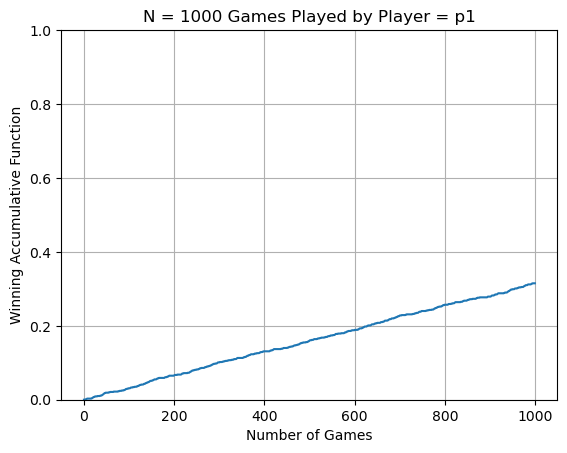

In [35]:
N = 1000
p1Games = iterGames("p1",N)
plotGames(p1Games,"p1",N)

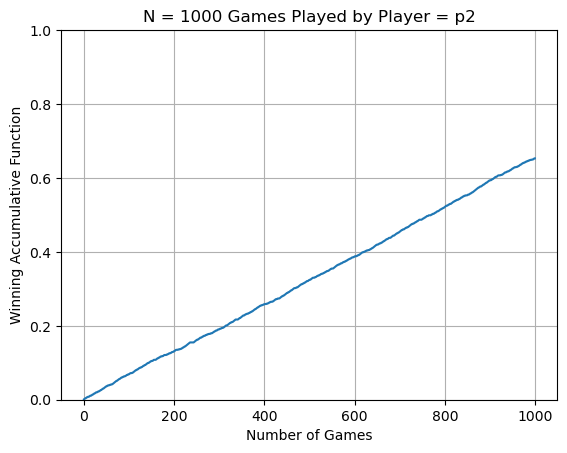

In [36]:
p2Games = iterGames("p2",N)
plotGames(p2Games,"p2",N)

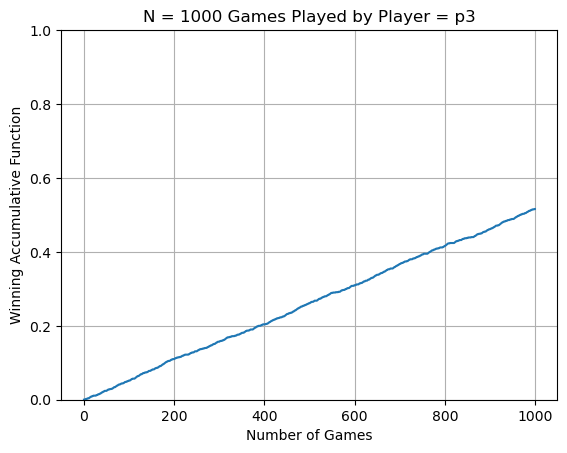

In [37]:
p3Games = iterGames("p3",N)
plotGames(p3Games,"p3",N)

# Section c - Calculate P3 results using only P1 and P2 results

Given P1 and P2 results in the game, P3 results can be calculated:
P(1) * P(x|y = 1) + P(2) * P(x|y = 2) => where P(1)\P(2) are the probabilities
of each player to play the game {in our case, player 3 is playing like player 1 with 
a probability of 0.5 and like player 2 with a probability of 0.5}
and P(x|y = k) is the probability of the outcome of the game, given that player k is playing the game (k = {1\2})

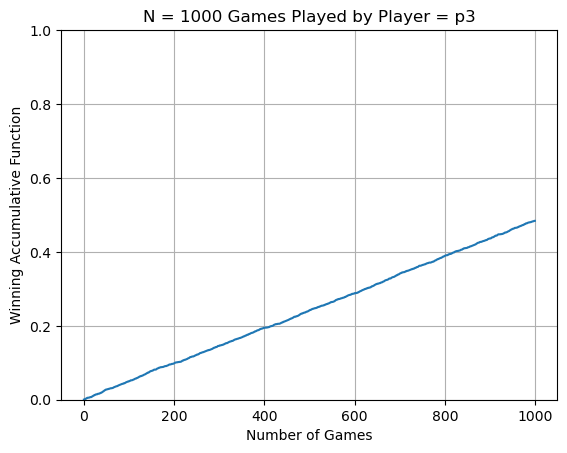

In [38]:
p3viap2p1 = 0.5*p1Games + 0.5*p2Games
plotGames(p3viap2p1,"p3",N)

As we can see, we got the expected results.